# Wine Quality Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import datasets
wine = datasets.load_wine()

In [3]:
import pandas as pd
df = pd.DataFrame(wine.data,columns=wine.feature_names)
df.head()

df_out=pd.DataFrame(wine.target)
df_out

,0
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [27]:
np.unique(wine.target)

array([0, 1, 2])

In [4]:
# target
y=wine.target
y

X=df
X

wine_full=[df,df_out]
wine_full

[     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid_phenols

In [5]:
# Corr plot

sn.heatmap(wine_full.corr(), annot = True, cmap =None)

AttributeError: 'list' object has no attribute 'corr'

In [5]:
# for ann split lables
y_ann=pd.get_dummies(wine.target)
y_ann

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [48]:
# test and train data split
from sklearn.model_selection import train_test_split
X_train_ann, X_test_ann, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=1)

len(y_test)

36

In [49]:
y_train_cat = to_categorical(y_train, 3)
y_test_cat = to_categorical(y_test, 3)
y_test_cat

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

# Feature Scaling (using StandardScalar)

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_fsc = sc.fit_transform(X_train_ann)
X_test_fsc= sc.transform(X_test_ann)

np.shape(y_train_cat)

(142, 3)

# Unsupervised ML: K Means Clustering 

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[17592296.383508474, 4543749.614531863, 2370689.6867829696, 1331903.0622637176, 916379.1871539167, 647326.0020260852, 412137.5091004584, 326044.57084739406, 271866.30174093874, 217887.3785603329]


Text(0, 0.5, 'SSE')

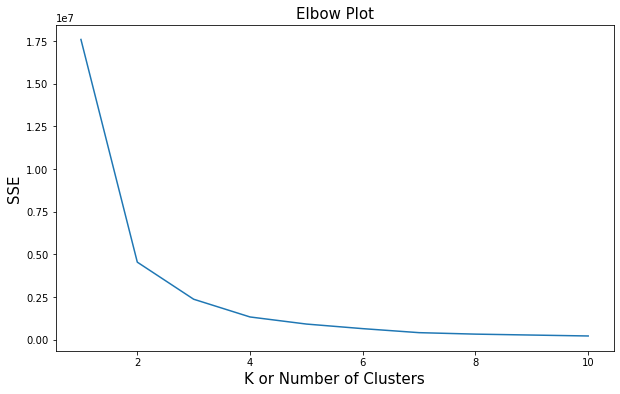

In [32]:
# Elbow plot
from sklearn.cluster import KMeans

sse=[]
k=range(1,11)
for i in range(1,11):
    km_t=KMeans(n_clusters=i)
    km_t.fit(X)
    sse_temp=km_t.inertia_
    sse.append(sse_temp)

print(sse)

# plot elbow 
plt.figure(figsize=(10,6))
plt.plot(k,sse)
plt.title('Elbow Plot',fontsize=15);plt.xlabel('K or Number of Clusters',fontsize=15);plt.ylabel('SSE',fontsize=15)

In [28]:
# KMeans Clustering

from sklearn.cluster import KMeans

km=KMeans(n_clusters=3)

# fit 
km.fit(X_train)

# predict
y_pred_km=km.predict(X_test)
y_pred_km

array([1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0,
       1, 2, 1, 0, 2, 2, 2, 1, 0, 1, 0, 2, 1, 0])

# Naive Bayes Classifier

In [16]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()

# train
model_nb.fit(X_train,y_train)

#score
acc_nb=model_nb.score(X_test,y_test)
print("The score of the Naive Bayes model is:",round(acc_nb*100,2),"%")

# prediction
y_pred_nb=model_nb.predict(X_test)

# prob
model_nb.predict_proba(X_test)

# confusion martrix
from sklearn.metrics import confusion_matrix

cm_nb=confusion_matrix(y_test,y_pred_nb)
print(cm_nb)

The score of the Naive Bayes model is: 100.0 %
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]


In [9]:
# Multiple Models Run
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models=[LogisticRegression,SVC]
acc=[]

for i in range(len(models)):
    model=models[i]()
    model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    acc.append(score)
    print(f"Model name:{models[i]} with accuracy of: {score*100}")
    
print(acc)

Model name:<class 'sklearn.linear_model._logistic.LogisticRegression'> with accuracy of: 94.44444444444444
Model name:<class 'sklearn.svm._classes.SVC'> with accuracy of: 63.888888888888886
[0.9444444444444444, 0.6388888888888888]


# Artificial Neural Network 

Using MLP for Multi-Class Classification

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [56]:
# Multi Class ANN 

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 13))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 3, kernel_initializer = 'glorot_uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train_fsc, y_train_cat,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 32ms/step - loss: 1.5460 - accuracy: 0.3789 - val_loss: 1.6539 - val_accuracy: 0.2766
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 1.4412 - accuracy: 0.4632 - val_loss: 1.5659 - val_accuracy: 0.3404
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 1.3466 - accuracy: 0.4842 - val_loss: 1.4929 - val_accuracy: 0.3617
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 1.2742 - accuracy: 0.5053 - val_loss: 1.4202 - val_accuracy: 0.3830
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 1.1975 - accuracy: 0.5158 - val_loss: 1.3602 - val_accuracy: 0.4043
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 1.1346 - accuracy: 0.5158 - val_loss: 1.3075 - val_accuracy: 0.4043
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 1.0757 - accuracy: 0.5474 - val_loss: 1.2626 - val_accuracy: 0.4043
Epoch 

In [58]:
# Predicting the Test set results

pred = classifier.predict(X_test_ann)
pred
pred_ = np.argmax(to_categorical(pred), axis = 1)


2/2 [==============================] - 0s 4ms/step


In [59]:
classifier.evaluate(X_test_ann,y_test_cat)

2/2 [==============================] - 0s 4ms/step - loss: 416.6267 - accuracy: 0.3889


[416.6267395019531, 0.3888888955116272]

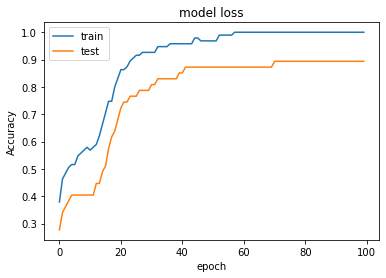

In [60]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

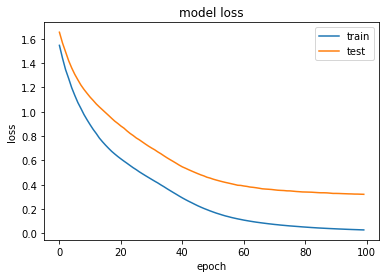

In [61]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()